In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("Heart Attack Data Set 2.csv")

In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# 1. Data Pre-processing:

# Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
data.corr()["target"]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

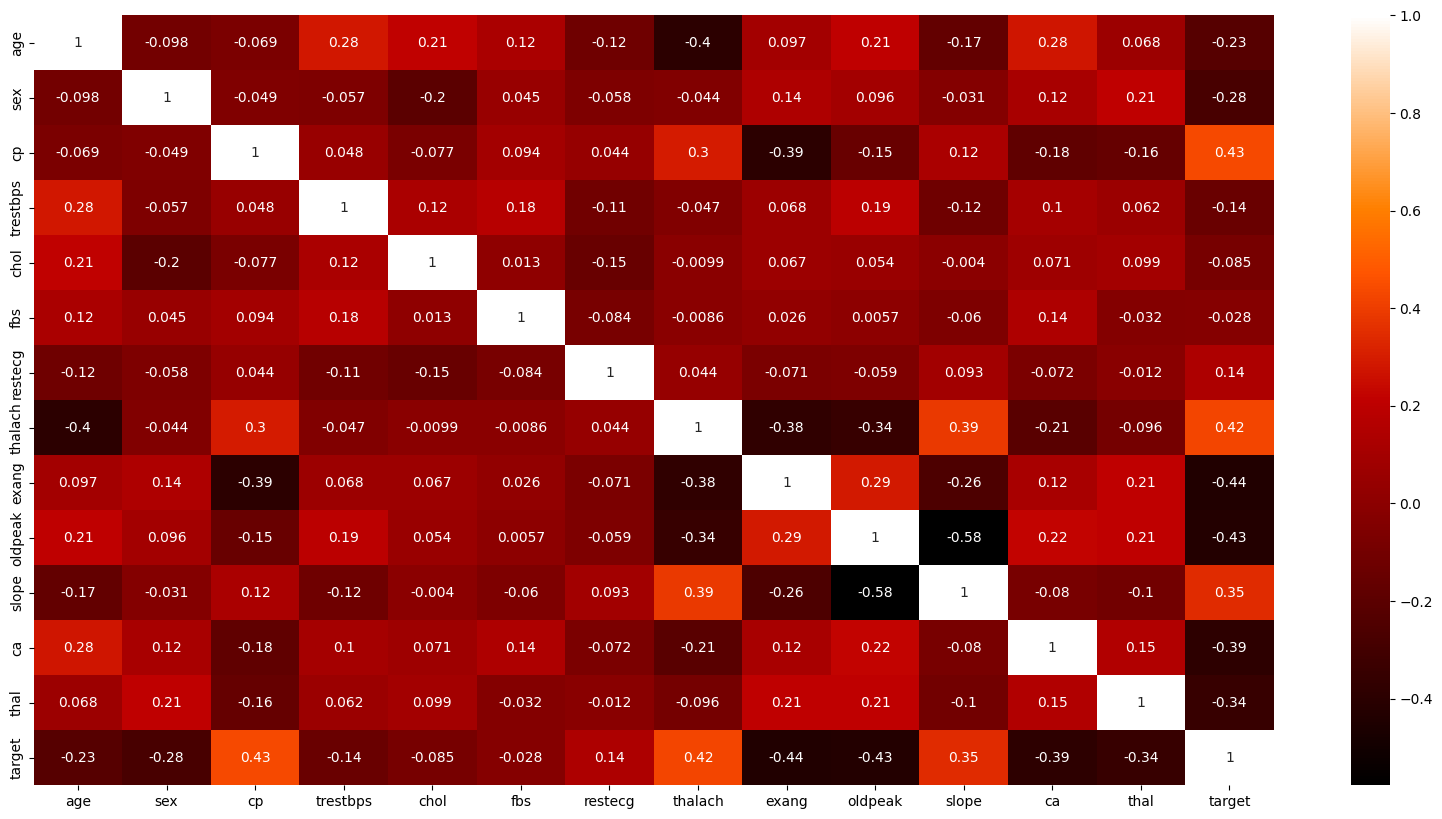

In [ ]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(data.corr(),annot=True,cmap="gist_heat",linecolor='black')

In [ ]:
import plotly
import plotly.express as px

In [ ]:
fig = px.pie(data, names = "target",
             title = "<b>Counts in HeartAttack</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 2)))


fig.show()

In [ ]:
# Split the data into features (X) and labels (y)
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 2. Train your ML-Engine with Train-test-split Method:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# 3. Apply Multi-Modal Data Processing Algorithms:

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = np.round(linear_reg.predict(X_test))


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("Linear Regression MSE:", mean_squared_error(y_test, linear_reg_pred))

Linear Regression MSE: 0.13114754098360656


In [ ]:
# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_reg_pred))

Logistic Regression Accuracy: 0.8524590163934426


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)



In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, decision_tree_pred))

Decision Tree Accuracy: 0.8360655737704918


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8688524590163934


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)


In [ ]:
print("Naive-Bayes Accuracy:", accuracy_score(y_test, naive_bayes_pred))



Naive-Bayes Accuracy: 0.8688524590163934


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, random_forest_pred))

Random Forest Accuracy: 0.819672131147541


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 0.9180327868852459


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from gensim.models import Word2Vec
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# Load Twitter US Airline Sentiment dataset
df = pd.read_csv('Tweets.csv')

In [65]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [66]:
# Encode sentiment labels to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['airline_sentiment'])

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [68]:
# 2. Apply TF-IDF Vectorization:

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [69]:
# Support Vector Machine with TF-IDF
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_pred = svm_tfidf.predict(X_test_tfidf)


In [70]:
# Evaluate SVM with TF-IDF
print("SVM with TF-IDF Accuracy:", accuracy_score(y_test, svm_tfidf_pred))

SVM with TF-IDF Accuracy: 0.7906420765027322


In [71]:

# 3. Apply Word2Vec:

# Tokenize the reviews
tokenized_tweets = [word_tokenize(tweet.lower()) for tweet in df['text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)


# Transform each tweet into an average vector
X_word2vec = [np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0) for words in tokenized_tweets]

# Split the data into training and testing sets
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_word2vec, df['label'], test_size=0.2, random_state=42)


In [72]:
# Support Vector Machine with Word2Vec
svm_w2v = SVC()
svm_w2v.fit(X_train_w2v, y_train_w2v)
svm_w2v_pred = svm_w2v.predict(X_test_w2v)

In [73]:
print("SVM with Word2Vec Accuracy:", accuracy_score(y_test_w2v, svm_w2v_pred))


SVM with Word2Vec Accuracy: 0.7336065573770492


In [74]:
# 4. Apply Recurrent Neural Network (RNN):

# Tokenize and pad sequences
max_len = 100
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_rnn = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_rnn = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Build RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=50, input_length=max_len))
model_rnn.add(LSTM(50))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
model_rnn.fit(X_train_rnn, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the RNN model
rnn_pred = (model_rnn.predict(X_test_rnn) > 0.5).astype('int32')
rnn_accuracy = accuracy_score(y_test, rnn_pred)

print("RNN Accuracy:", rnn_accuracy)


Epoch 1/5
293/293 [==============================] - 24s 72ms/step - loss: -0.0110 - accuracy: 0.5908 - val_loss: -0.9462 - val_accuracy: 0.6615
Epoch 2/5
293/293 [==============================] - 20s 67ms/step - loss: -2.1497 - accuracy: 0.6843 - val_loss: -2.5403 - val_accuracy: 0.6726
Epoch 3/5
293/293 [==============================] - 22s 75ms/step - loss: -4.5624 - accuracy: 0.7066 - val_loss: -3.9259 - val_accuracy: 0.6534
Epoch 4/5
293/293 [==============================] - 19s 66ms/step - loss: -7.1117 - accuracy: 0.7158 - val_loss: -5.4040 - val_accuracy: 0.6688
Epoch 5/5
92/92 [==============================] - 2s 14ms/step
RNN Accuracy: 0.6588114754098361
